In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from time import time



### DATA CLEANING AND PREPROCESSING

In [61]:
data = pd.read_csv("airline_passenger_satisfaction.csv")


In [62]:
data_cleaned = data_cleaned.drop(columns=[col for col in data_cleaned.columns if col.strip() == 'Unnamed: 0'])

In [63]:
# Checking for duplicate rows
duplicate_rows = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

data_cleaned = data.drop_duplicates()

print("Shape of cleaned DataFrame:", data_cleaned.shape)


Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, Gender, customer_type, age, type_of_travel, customer_class, flight_distance, inflight_wifi_service, departure_arrival_time_convenient, ease_of_online_booking, gate_location, food_and_drink, online_boarding, seat_comfort, inflight_entertainment, onboard_service, leg_room_service, baggage_handling, checkin_service, inflight_service, cleanliness, departure_delay_in_minutes, arrival_delay_in_minutes, satisfaction]
Index: []

[0 rows x 24 columns]
Shape of cleaned DataFrame: (129880, 24)


In [64]:
# Filling missing values with med for num columns and mode for cat columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for col in numerical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])



#### Label Encoding

In [65]:
# Encoding cat variables

le = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])


#### Normalization

In [66]:
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

In [67]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  float64
 1   Gender                             129880 non-null  int64  
 2   customer_type                      129880 non-null  int64  
 3   age                                129880 non-null  float64
 4   type_of_travel                     129880 non-null  int64  
 5   customer_class                     129880 non-null  int64  
 6   flight_distance                    129880 non-null  float64
 7   inflight_wifi_service              129880 non-null  float64
 8   departure_arrival_time_convenient  129880 non-null  float64
 9   ease_of_online_booking             129880 non-null  float64
 10  gate_location                      129880 non-null  float64
 11  food_and_drink                     1298

#### Handling Missing Values

In [57]:

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 arrival_delay_in_minutes    393
dtype: int64


In [10]:
# Impute with median values
data['arrival_delay_in_minutes'].fillna(data['arrival_delay_in_minutes'].median(), inplace=True)

missing_values_after = data['arrival_delay_in_minutes'].isnull().sum()
print(f"Missing values in 'arrival_delay_in_minutes' after imputation: {missing_values_after}")

Missing values in 'arrival_delay_in_minutes' after imputation: 0


In [11]:
print(data.isnull().sum())

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


### EXPLORATORY DATA ANALYSIS (EDA)

Most columns in the data consist of ratings or values obtained from customer surveys between 0-5. Hence,departure and arrival delays columns stand out and need to be dealt with.

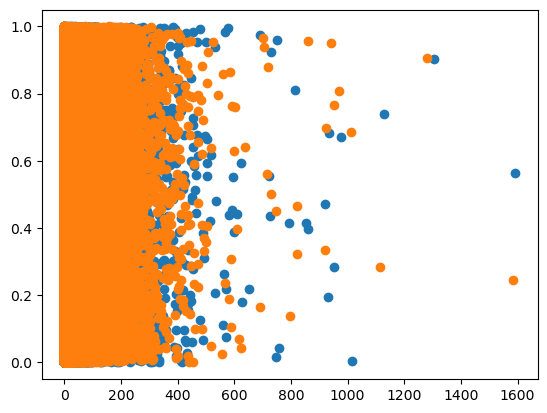

In [12]:
# Outlier detection

plt.scatter (data['departure_delay_in_minutes'], np.random.rand(data.shape[0]))
plt.scatter (data['arrival_delay_in_minutes'], np.random.rand(data.shape[0]))

In [13]:
# Calculating instances where either the departure time or arrival time exceeded 500 minutes

print ((data['arrival_delay_in_minutes']> 500).sum())
print ((data['departure_delay_in_minutes']> 500).sum())
print (((data['departure_delay_in_minutes']> 500) + (data['arrival_delay_in_minutes']> 500)).sum())

41
43
46


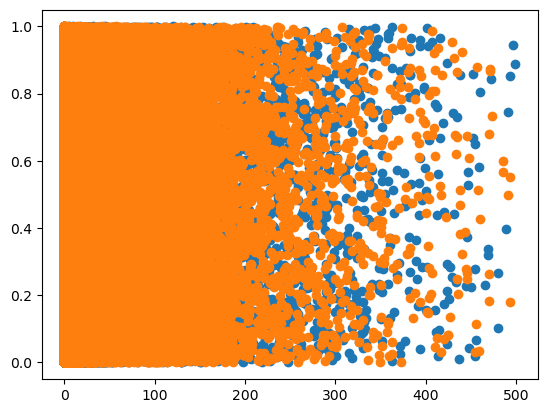

In [14]:
# Dealing with those 46 instances 

data = data[(data['arrival_delay_in_minutes'] <= 500)]
data = data[(data['departure_delay_in_minutes'] <= 500)]
plt.scatter (data['departure_delay_in_minutes'], np.random.rand(data.shape[0]))
plt.scatter (data['arrival_delay_in_minutes'], np.random.rand(data.shape[0]))

In [15]:
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
data_describe = data.describe()

# Checking target variable
satisfaction_counts = data['satisfaction'].value_counts()

print(satisfaction_counts)

print (data_describe)


neutral or dissatisfied    73422
satisfied                  56412
Name: satisfaction, dtype: int64
          Unnamed: 0            age  flight_distance  inflight_wifi_service  \
count  129834.000000  129834.000000    129834.000000          129834.000000   
mean    64938.061594      39.429425      1190.231642               2.728777   
std     37493.106927      15.119399       997.446730               1.329362   
min         0.000000       7.000000        31.000000               0.000000   
25%     32468.250000      27.000000       414.000000               2.000000   
50%     64940.500000      40.000000       844.000000               3.000000   
75%     97408.750000      51.000000      1744.000000               4.000000   
max    129879.000000      85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                      129834.000000           129834.000000   
mean                            3.057612             

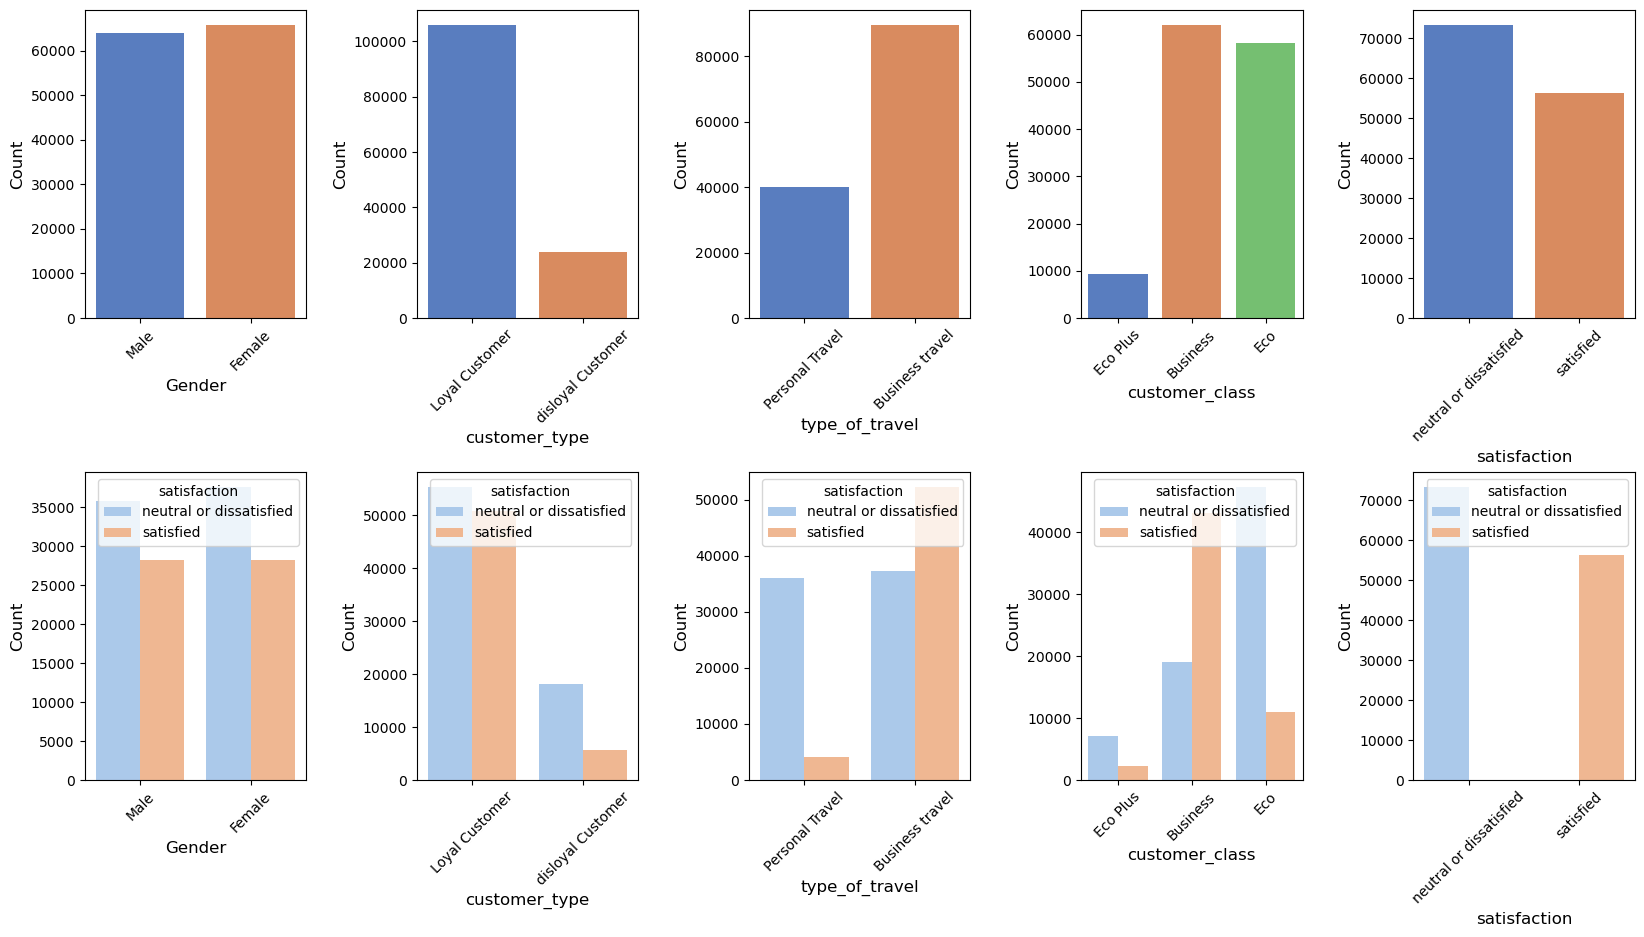

In [17]:
# Defining no. of cat columns to visualize
num_columns = len(categorical_columns) 

plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, col in enumerate(categorical_columns[:num_columns]):
    plt.subplot(2, num_columns, i+1)
    sns.countplot(data=data, x=col, palette='muted') 
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

    plt.subplot(2, num_columns, i+num_columns+1)
    sns.countplot(data=data, x=col, hue='satisfaction', palette='pastel')  
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

plt.show()


Interpretation:

- Women seem to be slightly less satisfied than men.
- The dataset has higher number of females than males.
- There are more loyal passengers in the data than disloyal passengers.
- Disloyal passengers are most often dissatisfied with the flight.
- Passengers who choose business class are much more likely to be satisfied than those who choose economy or economy plus. 
- Passsengers who travel for personal purposes are more neutral or dissatisfied while passengers who travel for business purposes are more satisfied.

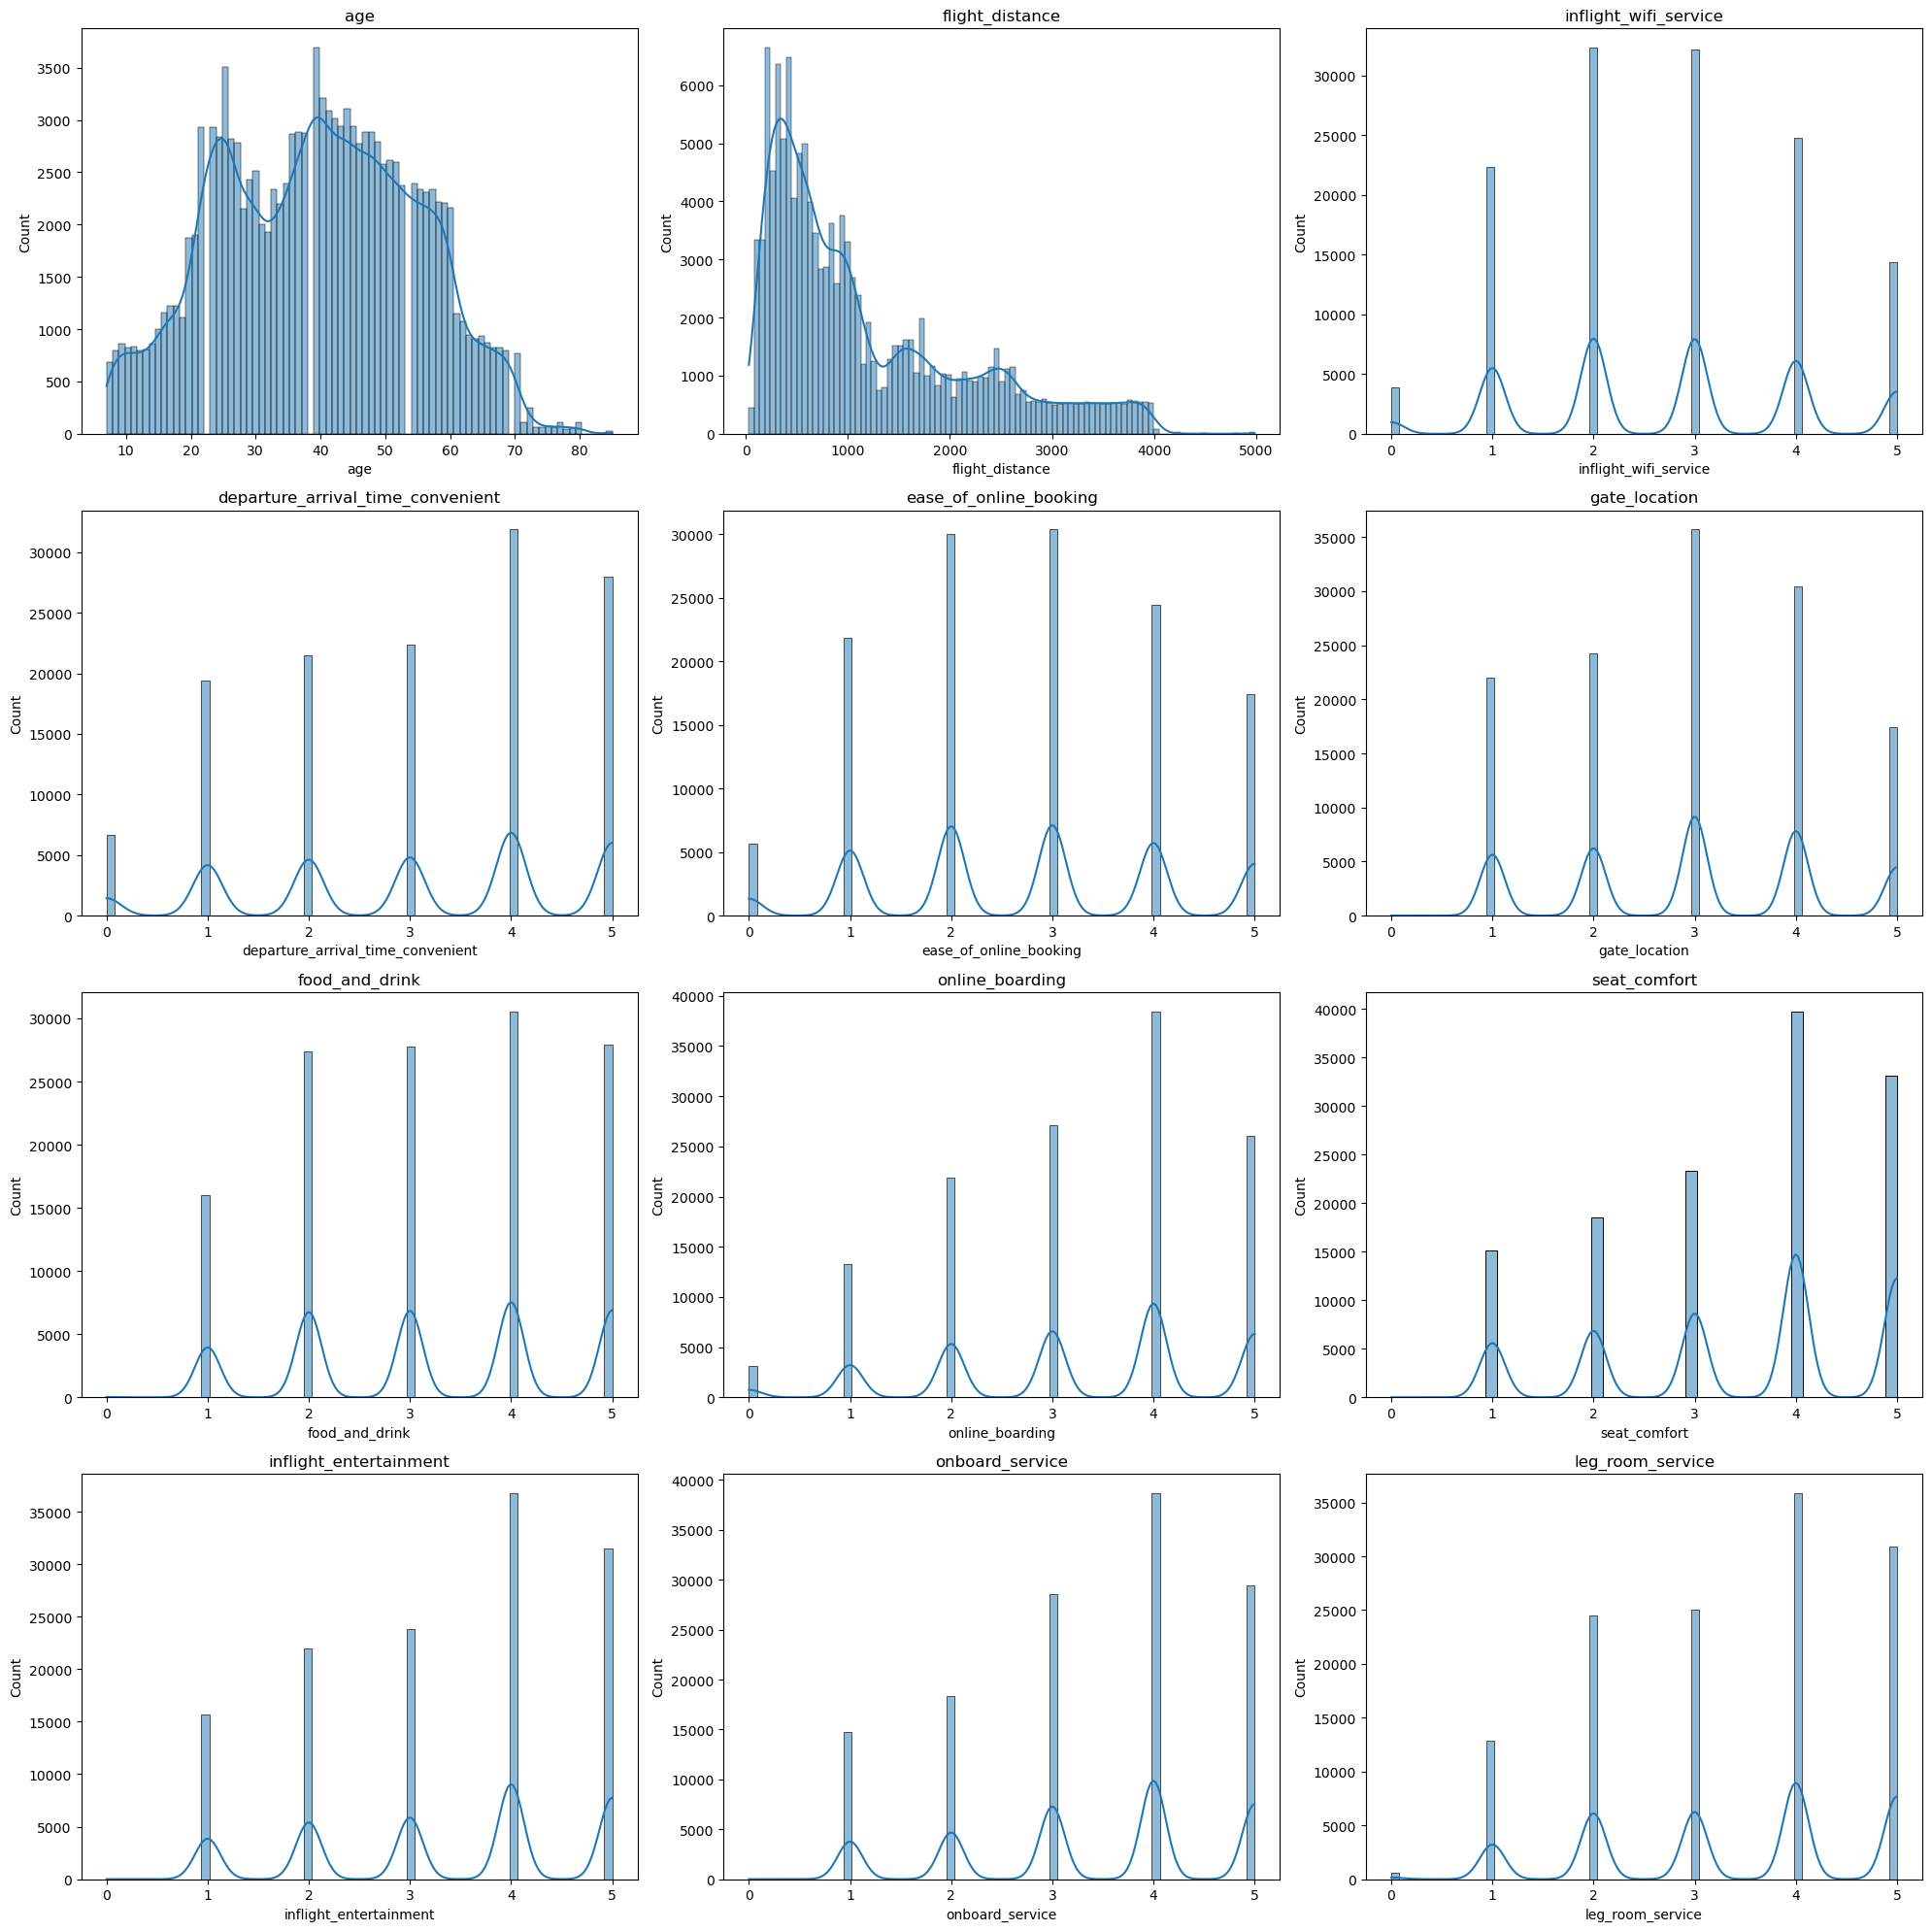

In [18]:
# Distribution of numerical features
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
numerical_features = ['age', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient',
                      'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding',
                      'seat_comfort', 'inflight_entertainment', 'onboard_service', 'leg_room_service']

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data[feature], ax=axs[row, col], kde=True).set_title(feature)

plt.tight_layout()



Interpretation: 
- Satisfaction increases with increasing age. Most dissatisfied passengers are nearly 25 years old, most satisfied passengers are nearly 45 years old
- The shorter the distance, the greater the dissatisfaction

Factors contributing to satisfaction:

* quality of food and drinks
* online boarding
* entertainment system on board
* enhanced service on board
* enhanced luggage service

Factors promoting dissatisfaction:

* low quality wi-fi
* lack of cleanliness
* lack of convenience of online booking
* bad food or drinks quality 
* poor seating comfort

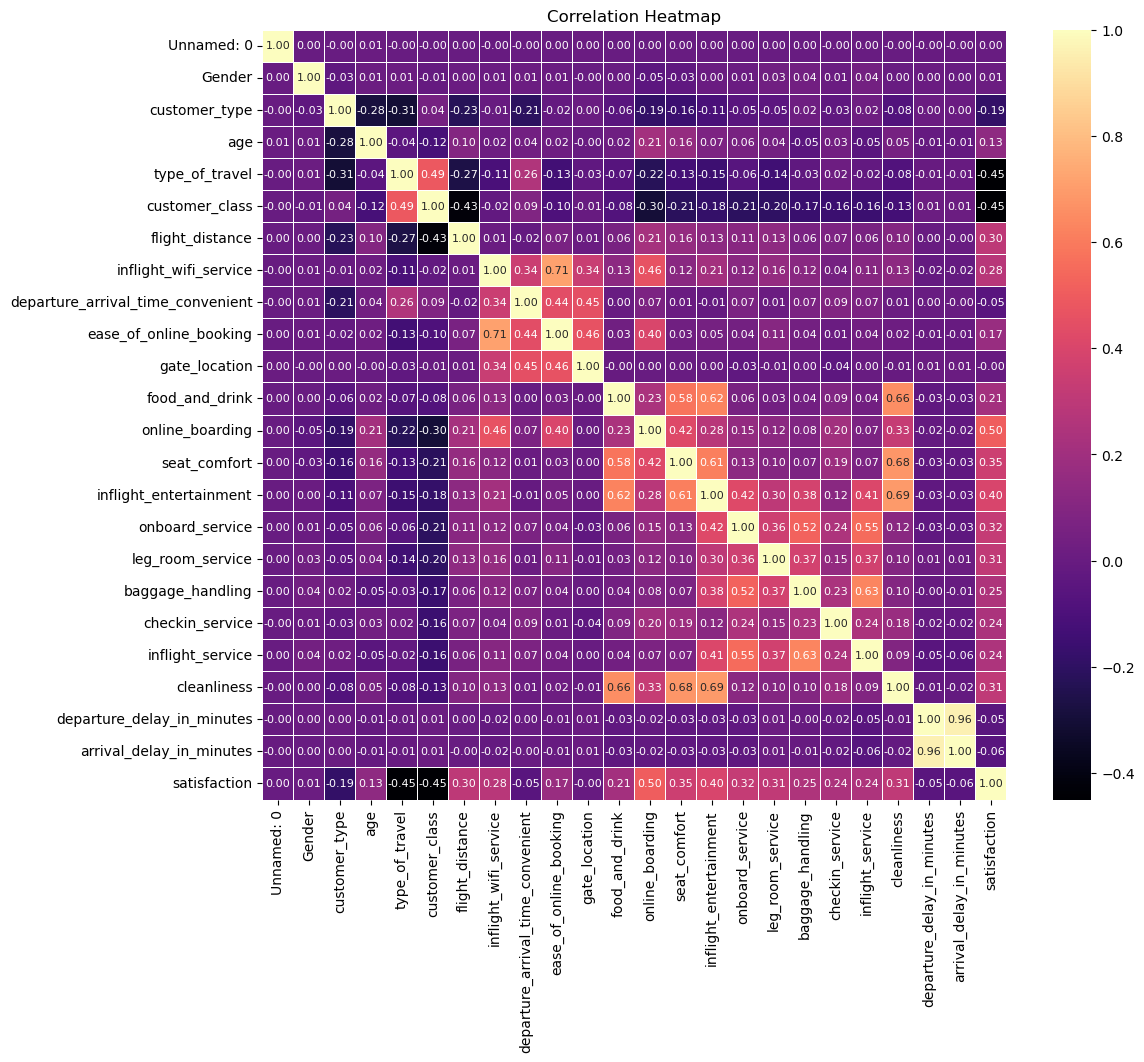

In [19]:
corr_matrix = data_cleaned.corr()

plt.figure(figsize=(12, 10))

cmap = sns.color_palette('magma', as_cmap=True)

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, annot_kws={"size": 8})
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()


Interpretation:
- There is a strong positive correlation between departure_delay_in_minutes and arrival_delay_in_minutes, which means that flights that are delayed on departure are also likely to arrive late.
- There is a weak negative correlation between customer_satisfaction and departure_delay_in_minutes , which means that customer satisfaction usually decreases as departure delays increases 
- It also implies that there is a tendency for customer satisfaction to increase as seat comfort increases.

### FEATURE SELECTION

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

X_adjusted = X_train - X_train.min()

# SelectKBest with ANOVA F-value
selector_f = SelectKBest(score_func=f_classif, k='all')  
selector_f.fit(X_adjusted, y_train)

feature_scores = pd.DataFrame({
    'Feature': X_adjusted.columns,
    'Score': selector_f.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


                              Feature         Score
12                    online_boarding  34871.209312
4                      type_of_travel  26422.458446
5                      customer_class  26309.006976
14             inflight_entertainment  19635.338199
13                       seat_comfort  14470.088831
15                    onboard_service  12122.663606
16                   leg_room_service  11206.592595
20                        cleanliness  10878.744044
6                     flight_distance  10235.510152
7               inflight_wifi_service   8960.595589
17                   baggage_handling   6882.685849
19                   inflight_service   6639.980177
18                    checkin_service   6212.344017
11                     food_and_drink   4902.260571
2                       customer_type   3669.189307
9              ease_of_online_booking   2988.184002
3                                 age   1942.350671
22           arrival_delay_in_minutes    336.356336
8   departur

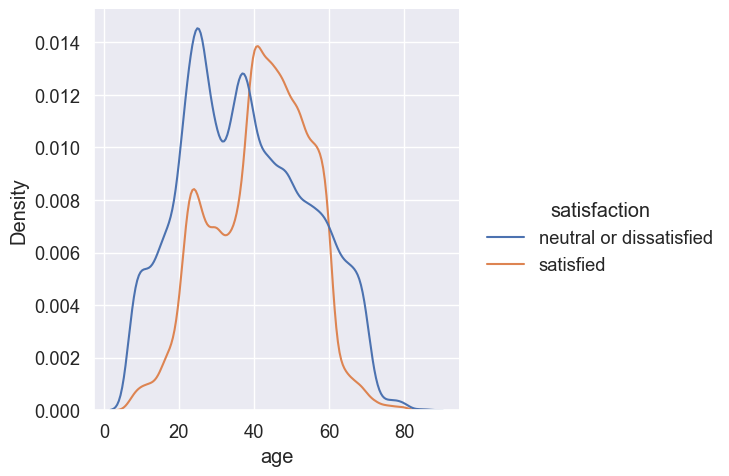

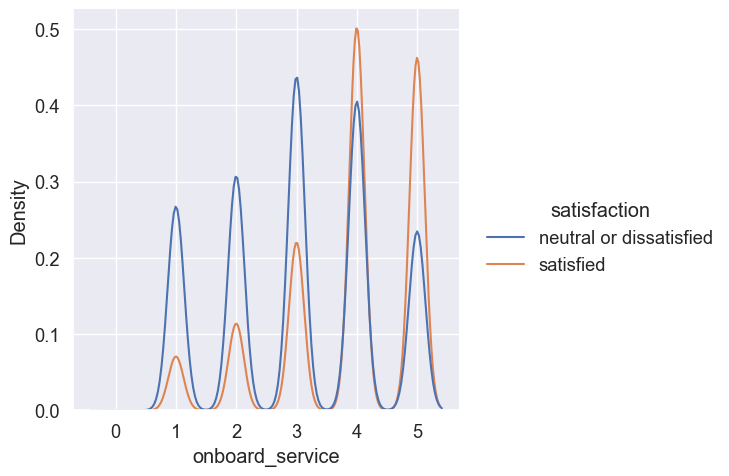

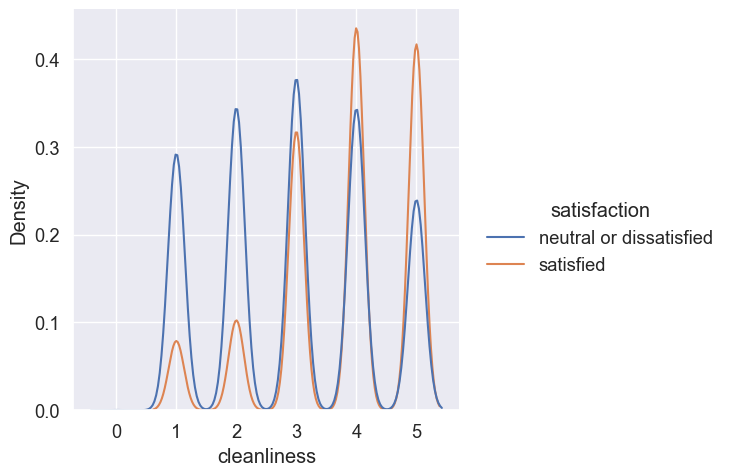

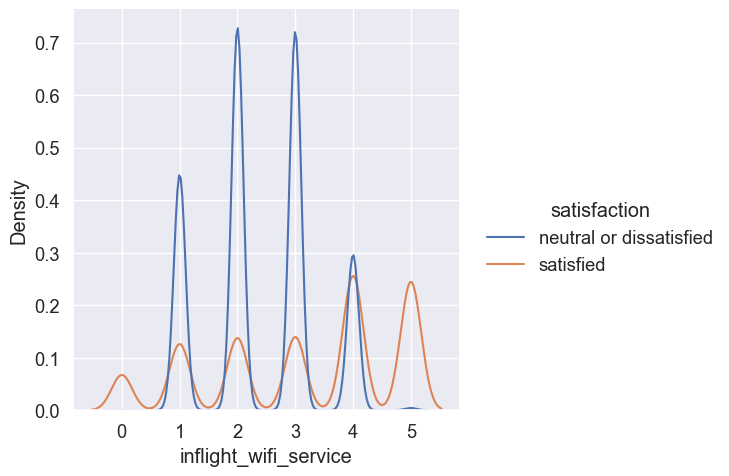

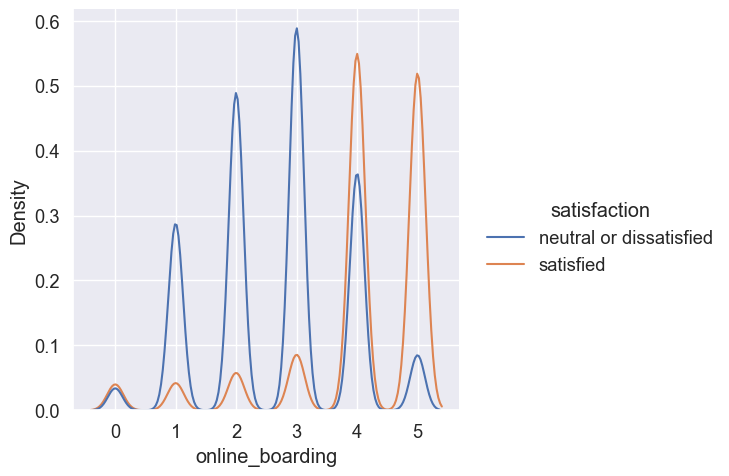

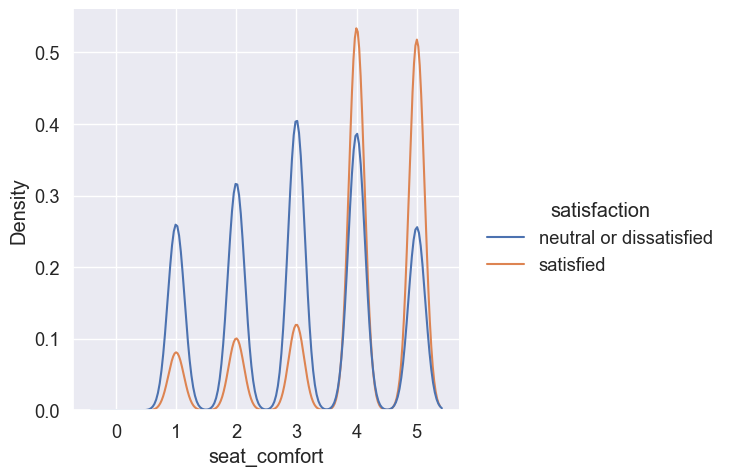

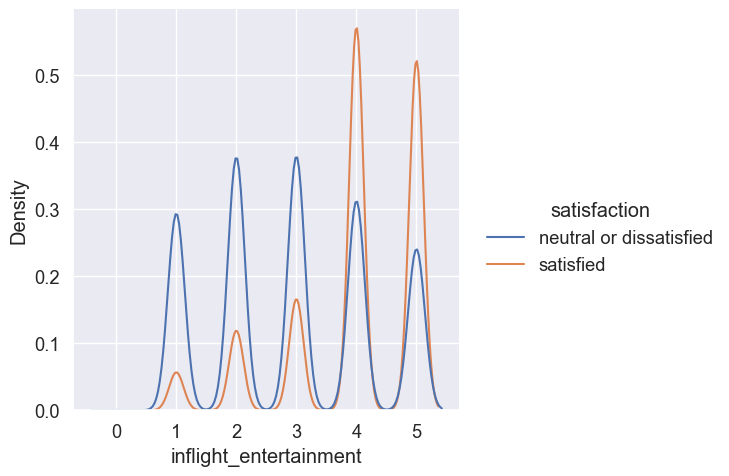

In [70]:
# Analyzing interesting features wrt satisfaction 
interesting_features = ['age', 'onboard_service', 'cleanliness', 'inflight_wifi_service', 'online_boarding', 'seat_comfort', 'inflight_entertainment']

sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for i, feature in enumerate(interesting_features):
    sns.displot(data=data, x=feature, kind='kde', hue = 'satisfaction')  
    
sns.despine()

### MODELING - Splitting into train and test sets

In [80]:
#Splitting

X = data_cleaned.drop('satisfaction', axis=1)
y = data_cleaned['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(103904, 23) (25976, 23) (103904,) (25976,)


### LOGISTIC REGRESSION BASELINE EVALUATION

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select only the top k features
selected_features = selector_f.get_support()
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

# Establish the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
y_test_pred = log_reg.predict(X_test_selected)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Accuracy: 0.8760009239297813

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     14622
           1       0.87      0.84      0.86     11354

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



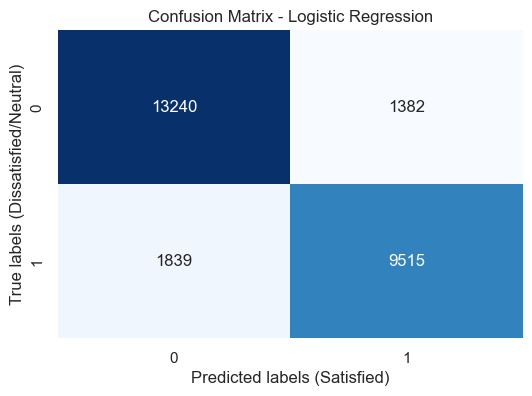

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted labels (Satisfied)")
plt.ylabel("True labels (Dissatisfied/Neutral)")
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

y_prob_log_reg = log_reg.predict_proba(X_test_selected)[:, 1]

# Computing ROC-AUC
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"ROC-AUC for Logistic Regression: {roc_auc_log_reg:.4f}")


ROC-AUC for Logistic Regression: 0.9257


### RANDOM FOREST BASELINE EVALUATION

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Establish the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)

# Train
random_forest.fit(X_train_selected, y_train)

# Predict on test set
y_test_pred = random_forest.predict(X_test_selected)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Accuracy: 0.9624653526331999

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.98      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



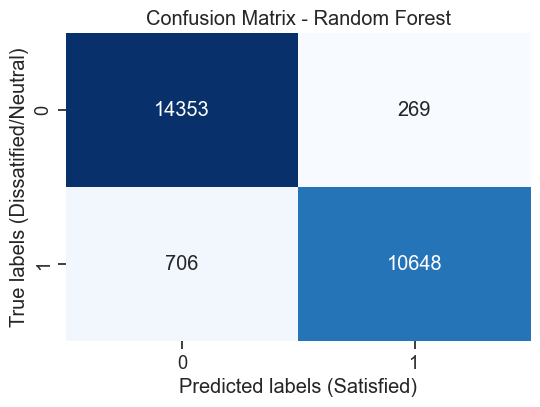

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate conf mat
conf_matrix_rf = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted labels (Satisfied)")
plt.ylabel("True labels (Dissatified/Neutral)")
plt.show()


In [28]:
y_prob_rf = random_forest.predict_proba(X_test_selected)[:, 1]

# Compute ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC-AUC for Random Forest: {roc_auc_rf:.4f}")

ROC-AUC for Random Forest: 0.9937


ROC-AUC value of 0.9938 suggests that the Random Forest performs exceptionally well in distinguishing between satisfied and neutral or dissatisfied passengers based on the predicted probabilities.

### DECISION TREE BASELINE EVALUATION

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define
decision_tree = DecisionTreeClassifier()

# Train
decision_tree.fit(X_train_selected, y_train)

# Predict on test set
y_pred_decision_tree = decision_tree.predict(X_test_selected)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report (y_test, y_pred_decision_tree))

Accuracy: 0.9463735756082537

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     14622
           1       0.94      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



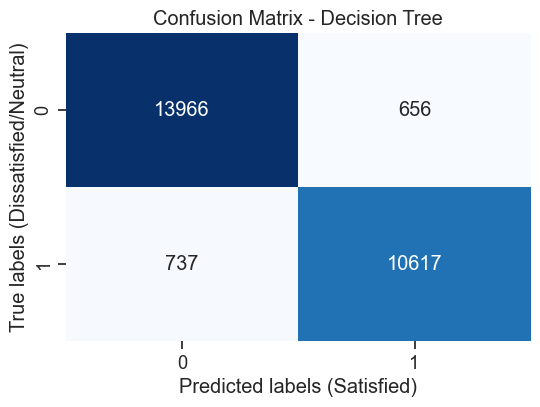

In [30]:
from sklearn.metrics import confusion_matrix

# Generate conf mat
conf_matrix_dt = confusion_matrix(y_test, y_pred_decision_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted labels (Satisfied)")
plt.ylabel("True labels (Dissatisfied/Neutral)")
plt.show()


In [32]:
y_prob_dt = decision_tree.predict_proba(X_test_selected)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print(f"ROC-AUC for Decision Tree: {roc_auc_dt:.4f}")

ROC-AUC for Decision Tree: 0.9451


### ROC CURVE COMPARISON

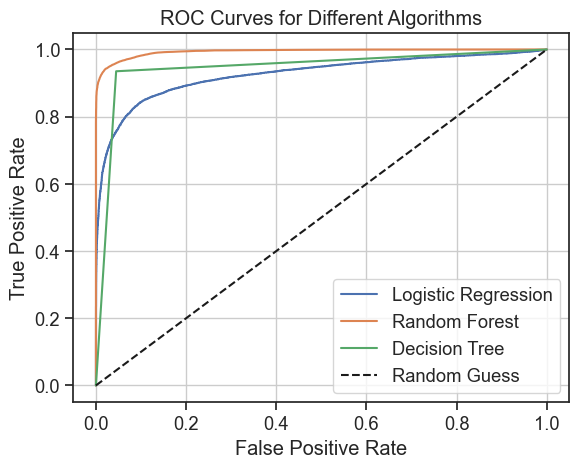

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# LogReg
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')

# RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

# DT
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()





### HYPERPARAMETER TUNING USING RANDOMSEARCHCV

#### TUNED LOGISTIC REGRESSION PERFORMANCE

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Defining parameter dist
param_distributions_log_reg = {
    'C': uniform(loc=0, scale=4),
    'solver': ['liblinear', 'saga']
}

# Randomized search 
random_search_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distributions_log_reg, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_log_reg.fit(X_train_selected, y_train)

print("Best parameters (Randomized Search) for Logistic Regression:", random_search_log_reg.best_params_)
print("Best score:", random_search_log_reg.best_score_)

# Predict on test set
y_test_pred_log_reg = random_search_log_reg.predict(X_test_selected)

# Evaluate
print("Accuracy with Logistic Regression:", accuracy_score(y_test, y_test_pred_log_reg))
print("\nClassification Report:\n", classification_report (y_test, y_test_pred_log_reg))


Best parameters (Randomized Search) for Logistic Regression: {'C': 0.7337391594646552, 'solver': 'saga'}
Best score: 0.874066462576707
Accuracy with Logistic Regression: 0.8760009239297813

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     14622
           1       0.87      0.84      0.86     11354

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



#### TUNED DECISION TREE PERFORMANCE

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Defining parameter dist
param_distributions_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

# Randomized search
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distributions_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_dt.fit(X_train_selected, y_train)

print("Best parameters (Randomized Search) for Decision Tree:", random_search_dt.best_params_)
print("Best score:", random_search_dt.best_score_)

# Predict on test set
y_test_pred_dt = random_search_dt.predict(X_test_selected)

# Evaluate
print("Accuracy with Decision Tree:", accuracy_score(y_test, y_test_pred_dt))
print("\nClassification Report:\n", classification_report (y_test, y_test_pred_dt))


Best parameters (Randomized Search) for Decision Tree: {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 7}
Best score: 0.9515033050800318
Accuracy with Decision Tree: 0.9527640899291654

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14622
           1       0.96      0.93      0.95     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



#### TUNED RANDOM FOREST PERFORMANCE

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report

# Defining parameter dist
param_distributions_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

# Randomized search
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_selected, y_train)

print("Best parameters (Randomized Search) for Random Forest:", random_search_rf.best_params_)
print("Best score:", random_search_rf.best_score_)

# Predict on test set
y_test_pred_rf = random_search_rf.predict(X_test_selected)

# Evaluating
print("Accuracy with Random Forest:", accuracy_score(y_test, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))


/Users/GokuSSJ/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters (Randomized Search) for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 393}
Best score: 0.9611853335154426
Accuracy with Random Forest: 0.9615414228518633

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.97      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### MODEL PERFORMANCE COMPARISON AFTER HYPERPARAMETER TUNING

In [71]:
# Inputting obtained values
performance_data = {
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": [0.876, 0.962, 0.953],
    "Precision (Class 0)": [0.88, 0.95, 0.95],
    "Precision (Class 1)": [0.87, 0.97, 0.96],
    "Recall (Class 0)": [0.91, 0.98, 0.97],
    "Recall (Class 1)": [0.84, 0.94, 0.93],
    "F1-Score (Class 0)": [0.89, 0.97, 0.96],
    "F1-Score (Class 1)": [0.86, 0.96, 0.95]
}

# Converting to df
performance_df = pd.DataFrame(performance_data)

print(performance_df)


                 Model  Accuracy  Precision (Class 0)  Precision (Class 1)  \
0  Logistic Regression     0.876                 0.88                 0.87   
1        Random Forest     0.962                 0.95                 0.97   
2        Decision Tree     0.953                 0.95                 0.96   

   Recall (Class 0)  Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  
0              0.91              0.84                0.89                0.86  
1              0.98              0.94                0.97                0.96  
2              0.97              0.93                0.96                0.95  


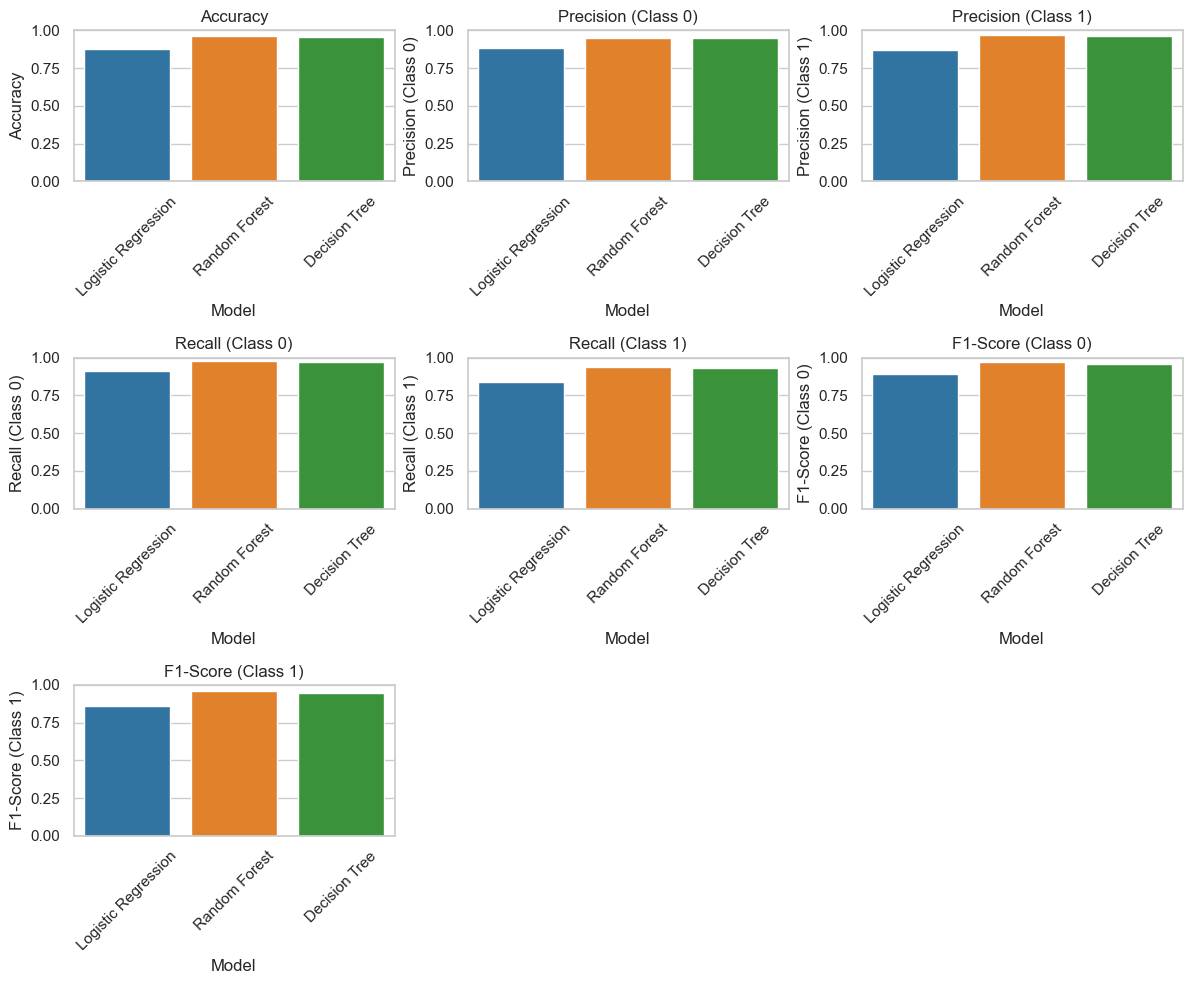

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

sns.set(style="whitegrid")

# Plotting metrics to show comparison for both classes
metrics = ["Accuracy", "Precision (Class 0)", "Precision (Class 1)", 
           "Recall (Class 0)", "Recall (Class 1)", 
           "F1-Score (Class 0)", "F1-Score (Class 1)"]
n_metrics = len(metrics)

plt.figure(figsize=(12, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x="Model", y=metric, data=performance_df, palette=colors)
    plt.xticks(rotation=45)
    plt.title(metric)
    plt.ylim(0, 1) 

plt.tight_layout()
plt.show()



Interpretation : 
    Hyperparameter tuning using RandomSearchCV actually increased the accuracy score of decision tree from 0.947 to 0.952 possibly due to - Decision tree's sensitivity to feature importance, the most important features were well represented in the selected hyperparameters, resulting in better model performance. The accuracy scores of Logistic Regression and Random Forest observed a negligible change post hyperparameter tuning.

### MODELS COMPUTATIONAL TIME COMPARISON

In [46]:
times = {
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Training Time (s)": [],
    "Prediction Time (s)": []
}

# Tuned models
models = [random_search_log_reg, random_search_rf, random_search_dt]

for model in models:
    # Calculate tt
    start_time = time()
    model.fit(X_train, y_train)
    training_time = time() - start_time
    
    # Calculate pt
    start_time = time()
    model.predict(X_test)
    prediction_time = time() - start_time
    
    times["Training Time (s)"].append(training_time)
    times["Prediction Time (s)"].append(prediction_time)

# Convert to DF
times_df = pd.DataFrame(times)
print(times_df)

/Users/GokuSSJ/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


                 Model  Training Time (s)  Prediction Time (s)
0  Logistic Regression           4.346748             0.007529
1        Random Forest         175.506506             0.925789
2        Decision Tree           4.161715             0.002955


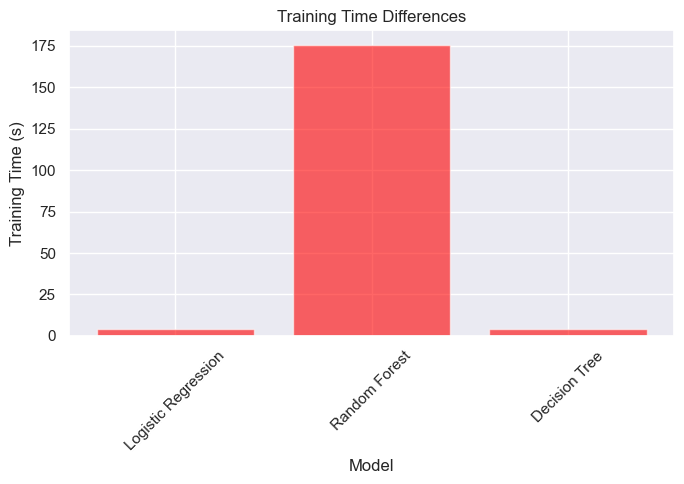

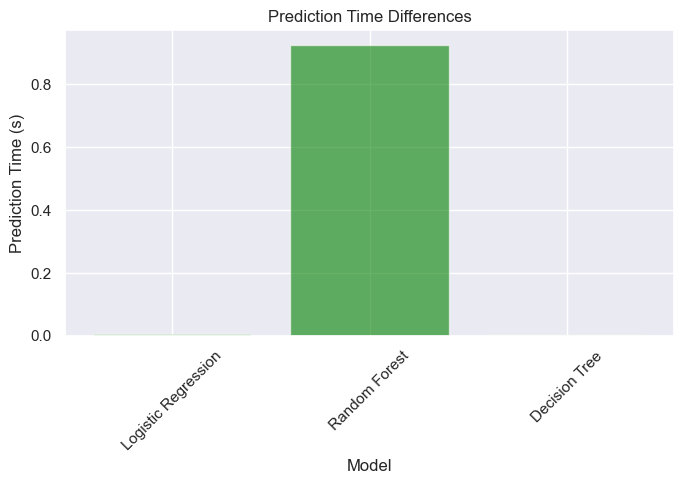

In [47]:
# Plotting tt diff
plt.figure(figsize=(7, 5))
plt.bar(times_df["Model"], times_df["Training Time (s)"], color='red', alpha=0.6)
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time Differences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting pt diff
plt.figure(figsize=(7, 5))
plt.bar(times_df["Model"], times_df["Prediction Time (s)"], color='green', alpha=0.6)
plt.xlabel('Model')
plt.ylabel('Prediction Time (s)')
plt.title('Prediction Time Differences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation:
1. The above plot clearly indicates that Random Forest took significantly longer to train as well as evaluate since it is an ensemble method which combines multiple decision trees and outputs a prediction. The training time and prediction time for random forest were 175.5 seconds and 0.92 seconds respectively. Some factors behind this delay may be the nature of the model - a. A random subset of features are selected for the set and the process is repeated for each tree and b. Bootstrapping - different subsets of the data are used.


2. Logistic regression is slightly slower in training at 4.34 seconds than decision tree (4.16 seconds) and a tad slower in predicting at 0.007 seconds compared to Decision Tree at 0.002 seconds, one reason why decision tree  is faster at training the model and evaluating may be that it is a non-parametric method and does not make any assumptions about data distribution.

### MODEL APPLICABILITY COMPARISON

- Logistic regression - Initial evaluation of the model using ANOVA F using SELECT K BEST feature selection technique produced good accuracy (nearly 0.87), precision, recall and F1 scores and after hyperparameter tuning using randomsearchCV , the performance did not change much and it reported an accuracy of 0.876, precision, recall and F1 scores were 0.88, 0.91 and 0.89 respectively. The performance was above par. Moreover, generating the computational time for training and predicting the model gave insights into how efficient and fast the algorithm is possibly due to it's linear nature. 

- Decision Tree - Decision Tree also managed to produce strong performance as it generated an accuracy score of 0.94 in initial evaluation using feature selection. The performance saw a slight incline after hyperparameter tuning. The precision, recall and F1 scores were 0.97, 0.95 and 0.96 repectively. Decision tree also had the best computational efficiency as it took the lowest time in training and predicting the model performance. Due to its tree based nature, it is also highly interpretable.

- Random Forest - Random Forest produced the highest performance scores in all the classification metrics. The accuracy, precision, recall and F1 scores of the model were 0.96, 0.95, 0.98 and 0.97 respectively. While it gave the best performance, it used up quite a lot of memory and resources and the computational efficiency for this model was the lowest out of all the three. It took 175.5 seconds to train and 0.925 seconds to evaluate.

- In conclusion, based on the results of this classification problem which involves determining whether a  passenger will be satisfied or not with the provided services of the airline, the airline business may choose decision tree over random forest if they don't have required computational resources and time, similarly the aviation industry may prefer random forest over decision tree if performance is the major driving factor.